In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("F://simplilearn/Healthcare - Diabetes/health_care_diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Distribution of Features

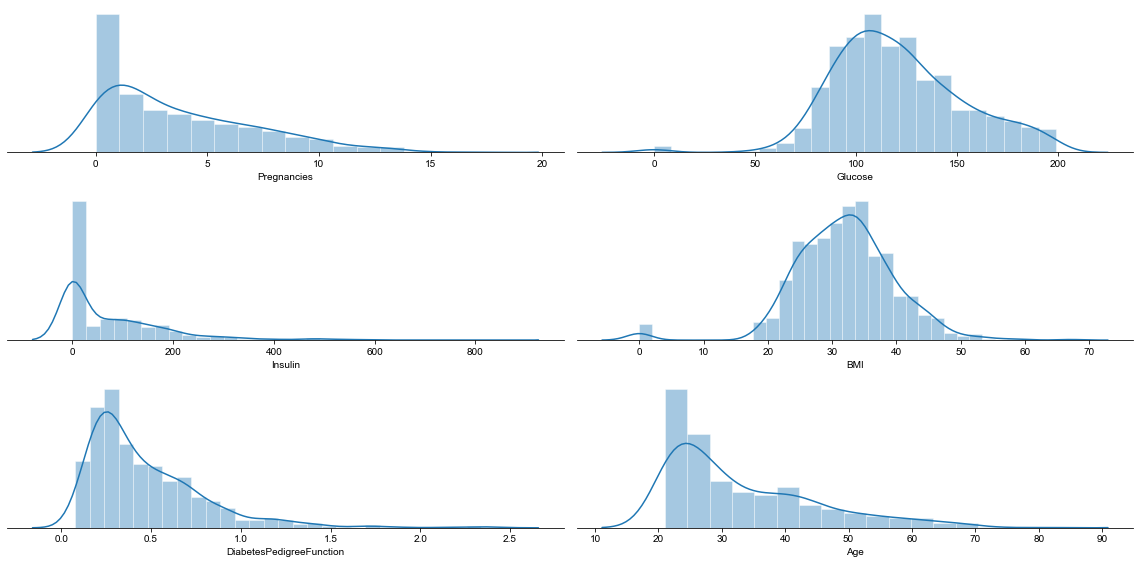

In [6]:
fig, axes = plt.subplots(3, 2, figsize=(16,8))
#fig.suptitle("Distribution of different Features")
sns.set(style="white", palette="muted", color_codes=True)
sns.despine(left=True)

sns.distplot(df['Pregnancies'],ax=axes[0,0])
sns.distplot(df['Glucose'],ax=axes[0,1])
sns.distplot(df['Insulin'],ax=axes[1,0])
sns.distplot(df['BMI'],ax=axes[1,1])
sns.distplot(df['DiabetesPedigreeFunction'],ax=axes[2,0])
sns.distplot(df['Age'],ax=axes[2,1])
plt.setp(axes, yticks=[])

plt.tight_layout()




###### Columns with zeros 

In [7]:
for i in df.columns:
    print(i,":",df[df[i]==0].shape[0])

Pregnancies : 111
Glucose : 5
BloodPressure : 35
SkinThickness : 227
Insulin : 374
BMI : 11
DiabetesPedigreeFunction : 0
Age : 0
Outcome : 500


In [8]:
df[df['SkinThickness']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
9,8,125,96,0,0,0.0,0.232,54,1
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
757,0,123,72,0,0,36.3,0.258,52,1
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
762,9,89,62,0,0,22.5,0.142,33,0


#### Columns with zeros in features except pregnancy make no sense. Hence they imply missing values

In [9]:
cols_to_be_imputed=["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
for i in cols_to_be_imputed:
    df[i]=df[i].replace(0,df[i].mean())

In [10]:
for i in df.columns:
    print(i,":",df[df[i]==0].shape[0])

Pregnancies : 111
Glucose : 0
BloodPressure : 0
SkinThickness : 0
Insulin : 0
BMI : 0
DiabetesPedigreeFunction : 0
Age : 0
Outcome : 500


## Countplot of the Target variable

Count of class is 
 0    500
1    268
Name: Outcome, dtype: int64


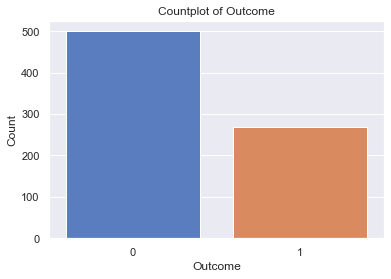

In [11]:
sns.set_style('darkgrid')
sns.countplot(df['Outcome'])
plt.title("Countplot of Outcome")
plt.xlabel('Outcome')
plt.ylabel("Count")
print("Count of class is","\n",df['Outcome'].value_counts())

### Checking the relationship between different variables using scatter plot

Text(0.5, 1.0, 'Relationship between variables')

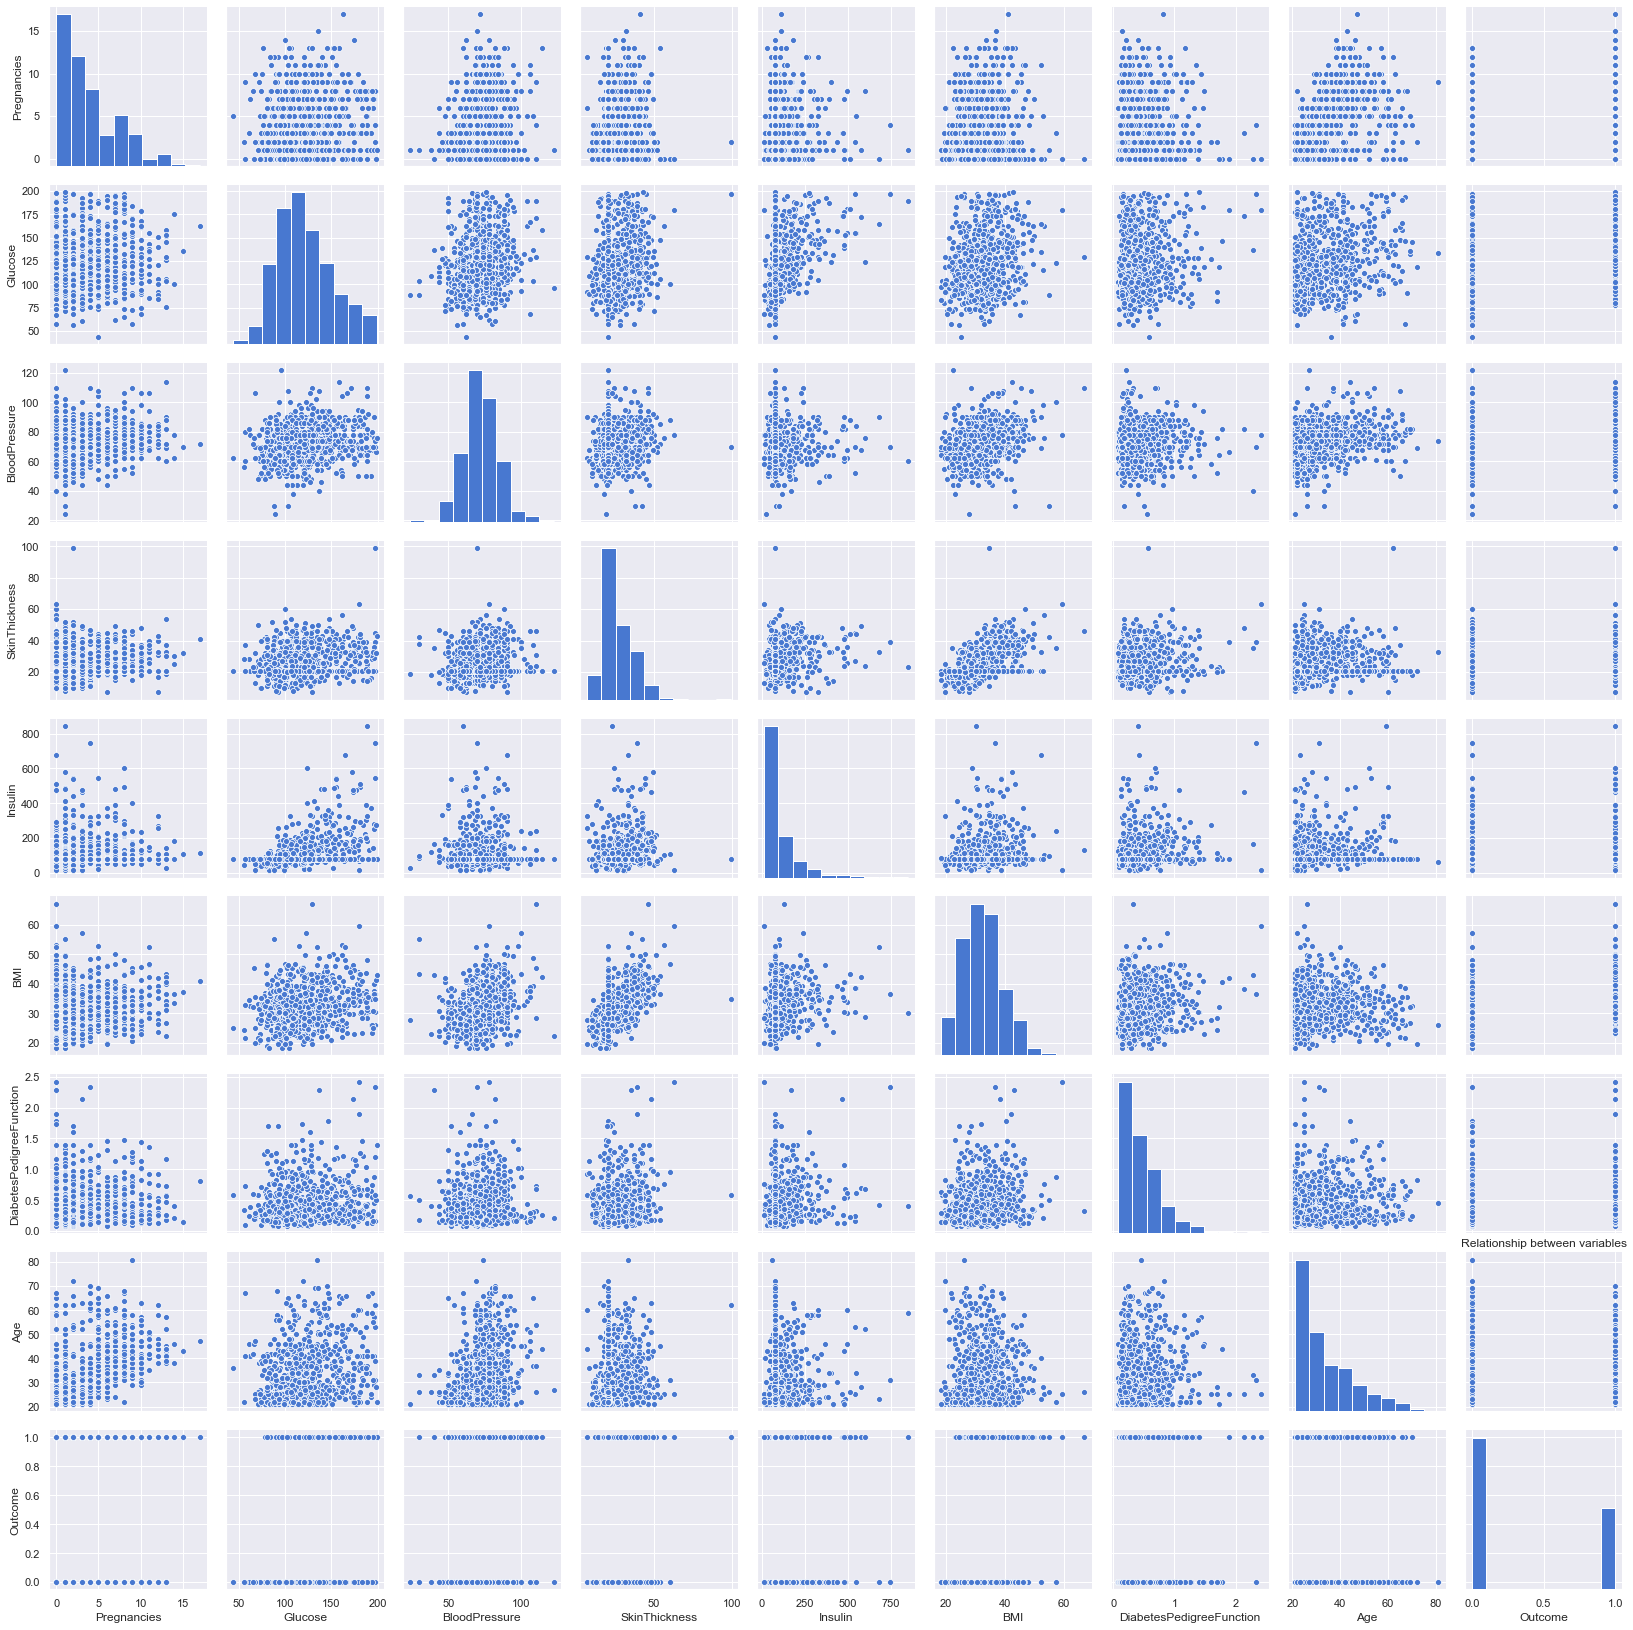

In [12]:
sns.pairplot(df)
plt.title('Relationship between variables')

## Correlation

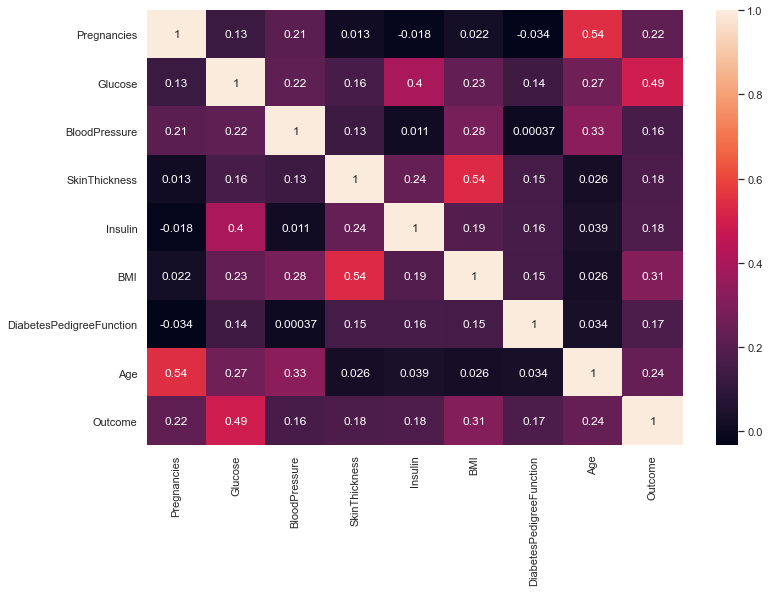

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

###### The is no multicollinearity among the feature variables

In [14]:
x=df.drop(['Outcome'],axis=1)
y=df['Outcome']

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=2021,test_size=0.2)

In [16]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

In [17]:
x_train_scaled=scale.fit_transform(x_train)
x_test_scaled=scale.transform(x_test)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

## KNN

In [19]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors':[5,10,15,25,30,50]}
knn_grid = GridSearchCV(knn,param_grid,scoring='accuracy')

In [20]:
knn_grid.fit(x_train_scaled,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 10, 15, 25, 30, 50]},
             scoring='accuracy')

In [21]:
knn_grid.best_params_

{'n_neighbors': 15}

In [22]:
knn_model = KNeighborsClassifier(n_neighbors=30) 
knn_model.fit(x_train_scaled,y_train)
knn_pred=knn_model.predict(x_test_scaled)

In [23]:
print("Test accuracy:",accuracy_score(knn_pred,y_test))
print("Train accuracy:",accuracy_score(knn_model.predict(x_train_scaled),y_train))
print(classification_report(knn_pred,y_test))

Test accuracy: 0.7662337662337663
Train accuracy: 0.7752442996742671
              precision    recall  f1-score   support

           0       0.92      0.76      0.83       117
           1       0.51      0.78      0.62        37

    accuracy                           0.77       154
   macro avg       0.71      0.77      0.72       154
weighted avg       0.82      0.77      0.78       154



In [24]:
from sklearn.metrics import auc,roc_curve

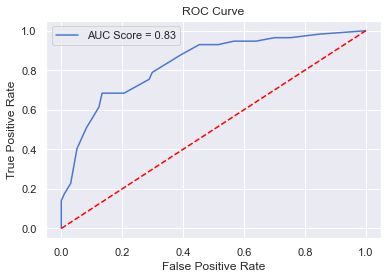

In [25]:
knn_prob=knn_model.predict_proba(x_test_scaled)
knn_prob1=knn_prob[:,1]
fpr,tpr,thresh=roc_curve(y_test,knn_prob1)
roc_auc_knn=auc(fpr,tpr)
#plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_knn)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

## Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [27]:
lr.fit(x_train_scaled,y_train)
print("Test accuracy:",accuracy_score(lr.predict(x_test_scaled),y_test))
print("Train accuracy:",accuracy_score(lr.predict(x_train_scaled),y_train))
print(classification_report(lr.predict(x_test_scaled),y_test))

Test accuracy: 0.7727272727272727
Train accuracy: 0.7768729641693811
              precision    recall  f1-score   support

           0       0.89      0.78      0.83       110
           1       0.58      0.75      0.65        44

    accuracy                           0.77       154
   macro avg       0.73      0.77      0.74       154
weighted avg       0.80      0.77      0.78       154



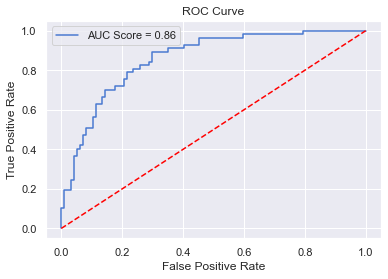

In [28]:
lr_prob=lr.predict_proba(x_test_scaled)[:,1]
fpr,tpr,thresh=roc_curve(y_test,lr_prob)
roc_auc_lr=auc(fpr,tpr)
#plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_lr)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

## Random Forest Classifier

In [29]:
from sklearn.model_selection import RandomizedSearchCV

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
param_grid = {'n_estimators':[50,100,150,200,300,500,700,1000],'max_depth':[2,3,4,5,7]}
rf_random = RandomizedSearchCV(rf,param_grid,scoring='accuracy')

In [31]:
rf_random.fit(x_train_scaled,y_train)


RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [2, 3, 4, 5, 7],
                                        'n_estimators': [50, 100, 150, 200, 300,
                                                         500, 700, 1000]},
                   scoring='accuracy')

In [32]:
rf_random.best_estimator_

RandomForestClassifier(max_depth=5, n_estimators=200)

In [33]:
rf_model = RandomForestClassifier(n_estimators=1000,max_depth=5)
rf_model.fit(x_train_scaled,y_train)

RandomForestClassifier(max_depth=5, n_estimators=1000)

In [34]:
print("Test accuracy:",accuracy_score(rf_model.predict(x_test_scaled),y_test))
print("Train accuracy:",accuracy_score(rf_model.predict(x_train_scaled),y_train))
print(classification_report(rf_model.predict(x_test_scaled),y_test))

Test accuracy: 0.7727272727272727
Train accuracy: 0.8583061889250815
              precision    recall  f1-score   support

           0       0.91      0.77      0.83       114
           1       0.54      0.78      0.64        40

    accuracy                           0.77       154
   macro avg       0.73      0.77      0.74       154
weighted avg       0.81      0.77      0.78       154



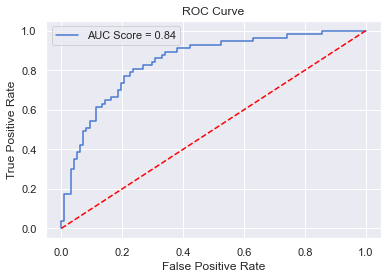

In [35]:
rf_prob=rf_model.predict_proba(x_test_scaled)[:,1]
fpr,tpr,thresh=roc_curve(y_test,rf_prob)
roc_auc_rf=auc(fpr,tpr)
#plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_rf)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

## XGBoost Classifier

In [36]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
param_grid = {'n_estimators':[50,100,150,200,300,500,700,1000],'max_depth':[2,3,4,5,7],'learning_rate':[0.1,0.15,0.2,0.25,0.3]}
xgb_random = RandomizedSearchCV(xgb,param_grid,scoring='accuracy')

In [37]:
xgb_random.fit(x_train_scaled,y_train,verbose=0)


C:\Users\Ravi\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:27:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:27:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:27:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:27:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, reg_alpha=None,
                                           reg_lamb

In [38]:
xgb_random.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [39]:
xgb_model=XGBClassifier(n_estimators=100,max_depth=3,learning_rate=0.1)
xgb_model.fit(x_train_scaled,y_train)

[18:27:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [40]:
print("Test accuracy:",accuracy_score(xgb_model.predict(x_test_scaled),y_test))
print("Train accuracy:",accuracy_score(xgb_model.predict(x_train_scaled),y_train))
print(classification_report(xgb_model.predict(x_test_scaled),y_test))

Test accuracy: 0.7532467532467533
Train accuracy: 0.8908794788273615
              precision    recall  f1-score   support

           0       0.85      0.78      0.81       105
           1       0.60      0.69      0.64        49

    accuracy                           0.75       154
   macro avg       0.72      0.74      0.73       154
weighted avg       0.77      0.75      0.76       154



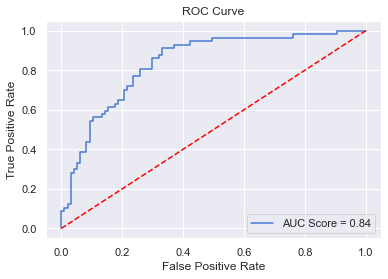

In [41]:
xgb_prob=xgb_model.predict_proba(x_test_scaled)[:,1]
fpr,tpr,thresh=roc_curve(y_test,xgb_prob)
roc_auc_xgb=auc(fpr,tpr)
#plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_xgb)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

#### Conclusion Logistic Regression model seems to be better among the all the model with AUC score of 0.86.